#### The Real Problem

One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact. In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organizations. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

#### Business Domain Value

In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings. Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure. L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams.

During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

#### Project Description

In this capstone project, the goal is to build a classifier that can classify the tickets by analyzing text.

Details about the data and dataset files are given in below link, https://drive.google.com/open?id=1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ

Pre-Processing, Data Visualization and EDA 

● Exploring the given Data files ● Understanding the structure of data ● Missing points in data ● Finding inconsistencies in the data ● Visualizing different patterns ● Visualizing different text features ● Dealing with missing values ● Text preprocessing ● Creating word vocabulary from the corpus of report text data ● Creating tokens as required 

Model Building 

 Building a model architecture which can classify.  Trying different model architectures by researching state of the art for similar tasks.  Train the model  To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

Test the Model, Fine-tuning and Repeat 

● Test the model and report as per evaluation metrics ● Try different models ● Try different evaluation metrics ● Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them ● Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.

### Import necessary libraries

In [512]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings("ignore")

## Pre-Processing, Data Visualization and EDA

### Loading and Exploring Data File

In [513]:
!pip install openpyxl

In [514]:
read_file = pd.read_excel ("input_data.xlsx", engine='openpyxl')
read_file.to_csv ("input_data.csv", index = None, header=True)
df = pd.read_csv("input_data.csv", encoding='utf-8')

In [515]:
#check the head of the dataset
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,spxjnwir pjlcoqds,GRP_0
1,outlook,"_x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [516]:
#check the tail of the dataset
df.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,"_x000D_\n_x000D_\nreceived from: avglmrts.vhqmtiua@gmail.com_x000D_\n_x000D_\ngood afternoon,_x000D_\ni am not receiving the emails that i sent from zz mail._x000D_\nplease advise_x000D_\n_x000D_\n",avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedxruyf,vip2: windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to finish the drawers adjustment settings._x000D_\nis no network..,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen.,an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen. bereich cnc.,kqvbrspl jyzoklfx,GRP_49


### Understanding Structure of Data

In [517]:
df.shape

(8500, 4)

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


#### Inferences


* This is a multi class classification Problem.
* Features are 'Description' , 'Short Description' and 'Caller' with Taget Variable is 'Assignment Group'having multipl classes.
* There are 4 columns - all of string format.
* There are 8500 rows - Few proportion of missing values can be observed in Description and Short Description.
* There are multiple languages used in description and short description and this needs to handled in pre processing.

#### Dropping Feature 'Caller' as this is unique and wont be useful for modeling

In [519]:
df_incidents = df.drop('Caller',axis=1)

In [520]:
# Reviewing number of unique values in target class 'Assignment Group'
df_incidents['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

Target Variable - 'Assignment Group' has 74 different classes

In [521]:
# Reviewing number of tickets on each class
df_incidents['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_30      39
GRP_15      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_22      31
GRP_1       31
GRP_11      30
GRP_21      29
GRP_47      27
GRP_62      25
GRP_48      25
GRP_23      25
GRP_60      20
GRP_39      19
GRP_27      18
GRP_37      16
GRP_44      15
GRP_36      15
GRP_50      14
GRP_65      11
GRP_53      11
GRP_52       9
GRP_55       8
GRP_51       8
GRP_49       6
GRP_46       6
GRP_59       6
GRP_43       5
GRP_66       4
GRP_32       4
GRP_68       3
GRP_63       3
GRP_38       3
GRP_58       3
GRP_56       3
GRP_57       2
GRP_54       2
GRP_69       2
GRP_71    

In [522]:
# Reviewing Proportions for Top 10 Groups based on incident
df_incidents['Assignment group'].value_counts(normalize = True).head(10)

GRP_0     0.467765
GRP_8     0.077765
GRP_24    0.034000
GRP_12    0.030235
GRP_9     0.029647
GRP_2     0.028353
GRP_19    0.025294
GRP_3     0.023529
GRP_6     0.021647
GRP_13    0.017059
Name: Assignment group, dtype: float64

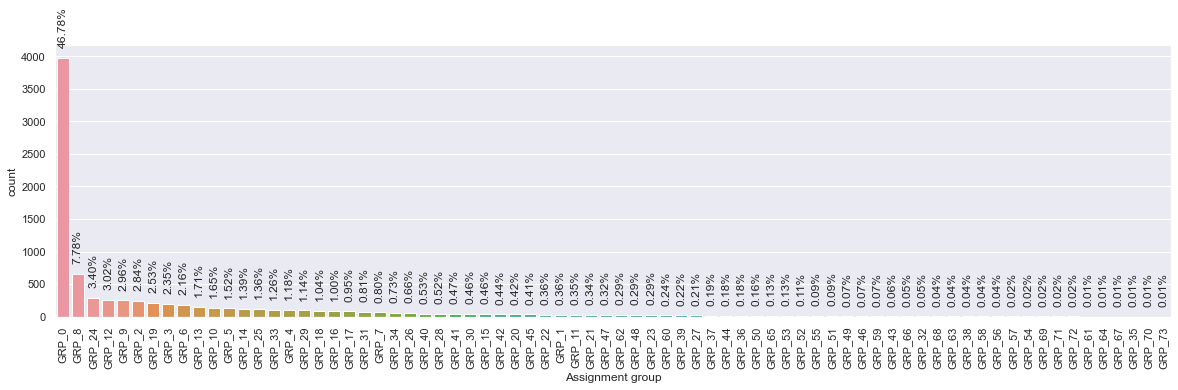

In [523]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df_incidents, order=df_incidents["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(str(format(p.get_height()/len(df_incidents.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

#### Inferences


* This is a imbalanced dataset, with majority of incidents are from Group 0 - 47%
* There are few classes which just have less incidents - To build an effective model, we need to have siginificant number of incidents (we may need to drop classes having less incidents - say less than 100 tickets)

#### Lets review distribution of tickets across various bins 

In [524]:
df_inc = df_incidents['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

,Description,Ticket Count
0,1 ticket,6
1,2-5 ticket,13
2,6-10 ticket,6
3,11-20 ticket,9
4,21-50 ticket,16
5,51-100 ticket,9
6,>100 ticket,15


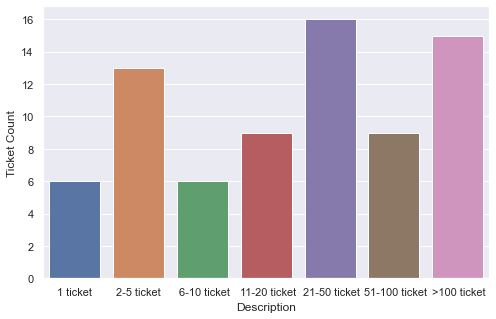

In [525]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Description", y="Ticket Count", data=df_bins);

#### Inferences


* There are 6 Assignment groups with only 1 ticket
* There are 13 assignemnt groups with only 2-5 ticket
* There are 6 Assignment group between 6-10 ticket
* Only 20% of Assignment Groups have more than 100 tickets

In [526]:
df_incidents_level = df_incidents.copy()

In [527]:
df_incidents_level.head()

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,GRP_0
1,outlook,"_x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0


### Insights on Tickets based on Teams - L1/L2 vs L3/Functional

Based on analysis on descriptions/short description it can bse observed that 'Group 0' belong to L1/L2 tickets and rest belongs to L3/Functional tickets 

In [528]:
df_incidents_level.loc[df_incidents_level['Assignment group'] != 'GRP_0','Incident_Type'] = 'L3/Functional'
df_incidents_level.loc[df_incidents_level['Assignment group'] == 'GRP_0','Incident_Type'] = 'L1/L2'

In [529]:
df_incidents_level.head()

,Short description,Description,Assignment group,Incident_Type
0,login issue,-verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,GRP_0,L1/L2
1,outlook,"_x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",GRP_0,L1/L2
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,GRP_0,L1/L2
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,L1/L2
4,skype error,skype error,GRP_0,L1/L2


In [530]:
df_incidents_level['Incident_Type'].value_counts(normalize = 'True')

L3/Functional    0.532235
L1/L2            0.467765
Name: Incident_Type, dtype: float64

<AxesSubplot:xlabel='Incident_Type', ylabel='count'>

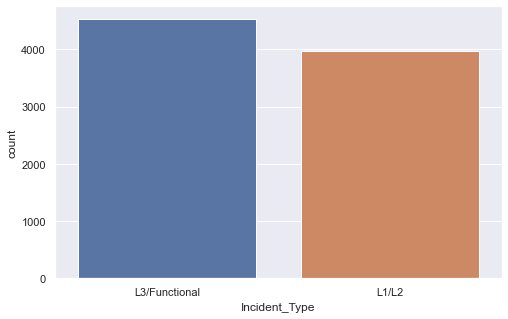

In [531]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="darkgrid")
plt.figure(figsize=(8,5))
sns.countplot(x="Incident_Type", data=df_incidents_level, order=df_incidents_level["Incident_Type"].value_counts().index)

#### Inferences


* Proportion of L1/L2 tickets is ~47%
* Proportion of L3/Functional tickets is ~53%

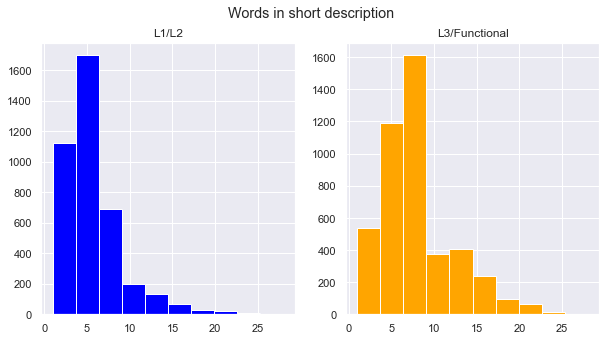

In [532]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Incident_Type']=='L1/L2']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax1.hist(text_len.dropna(),color='blue')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Incident_Type']=='L3/Functional']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax2.hist(text_len.dropna(),color='orange')
ax2.set_title('L3/Functional')
fig.suptitle('Words in short description')
plt.show()

It can be observed that L3/Functional tickets will have more words in short description compared to L1/L2 tickets

### Handling Missing Values

In [533]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Assignment group   8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


There are 8 null values for 'Short Description' and 1 null value for 'Description'

In [534]:
df_incidents[df_incidents['Short description'].isnull()]

,Short description,Description,Assignment group
2604,NaN,"_x000D_\n_x000D_\nreceived from: ohdrnswl.rezuibdt@gmail.com_x000D_\n_x000D_\nhi,_x000D_\n_x000D_\n_x000D_\n_x000D_\nlink is not working. kindly resolve yhe issue on urgent basis._x000D_\n_x000D_\n_x000D_\n_x000D_\nbest",GRP_34
3383,NaN,_x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the portal._x000D_\n-issue resolved.,GRP_0
3906,NaN,-user unable tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.,GRP_0
3910,NaN,-user unable tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.,GRP_0
3915,NaN,-user unable tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.,GRP_0
3921,NaN,-user unable tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,GRP_0
4341,NaN,"_x000D_\n_x000D_\nreceived from: eqmuniov.ehxkcbgj@gmail.com_x000D_\n_x000D_\ngood morning,_x000D_\n_x000D_\nwhen trying to log on to erp i get this error below._x000D_\nplease help urgently as i can not process customer order._x000D_\n_x000D_\n[cid:image001.png@01d20f2e.751db880]_x000D_\n_x000D_\n_x000D_\n",GRP_0


In [535]:
df_incidents[df_incidents['Description'].isnull()]

,Short description,Description,Assignment group
4395,i am locked out of skype,NaN,GRP_0


Lets replace Null with empty values and join 'Description' and 'Short Description' and create a ne feature 'New Description'

In [536]:
#Replace NaN values in Short Description and Description columns
df_incidents['Short description'] = df_incidents['Short description'].replace(np.nan, '', regex=True)
df_incidents['Description'] = df_incidents['Description'].replace(np.nan, '', regex=True)

In [537]:
df_incidents.shape

(8500, 3)

In [538]:
df_incidents[df_incidents.duplicated(keep = 'last')].count()

Short description    591
Description          591
Assignment group     591
dtype: int64

In [539]:
df_incidents.drop_duplicates(inplace=True)

In [540]:
df_incidents.shape

(7909, 3)

In [541]:
#Concatenate Short Description and Description columns
df_incidents['New_Description'] = df_incidents['Short description'] + ' ' +df_incidents['Description']

In [542]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description
0,login issue,-verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,GRP_0,login issue -verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.
1,outlook,"_x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",GRP_0,"outlook _x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind"
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access hr_tool page
4,skype error,skype error,GRP_0,skype error skype error


In [543]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7909 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  7909 non-null   object
 1   Description        7909 non-null   object
 2   Assignment group   7909 non-null   object
 3   New_Description    7909 non-null   object
dtypes: object(4)
memory usage: 308.9+ KB


Now there are no missing values

It can be observed that there are descriptions in multiple languages. Lets anlayse different languages used

In [544]:
from langdetect import detect
    
def fn_lan_detect(df):                                        
    try:                                                          
        return detect(df)                                      
    except:                                                       
        return 'no'                                                  

df_incidents['language'] = df_incidents['New_Description'].apply(fn_lan_detect)

In [545]:
df_incidents["language"].value_counts()

en    6681
de     384
af     177
it      97
fr      85
sv      77
no      71
da      67
nl      66
ca      48
es      29
pl      28
pt      24
cy      11
sq      10
hr       9
tl       9
ro       8
id       5
tr       5
sl       4
fi       4
et       3
so       2
cs       2
lt       2
sk       1
Name: language, dtype: int64

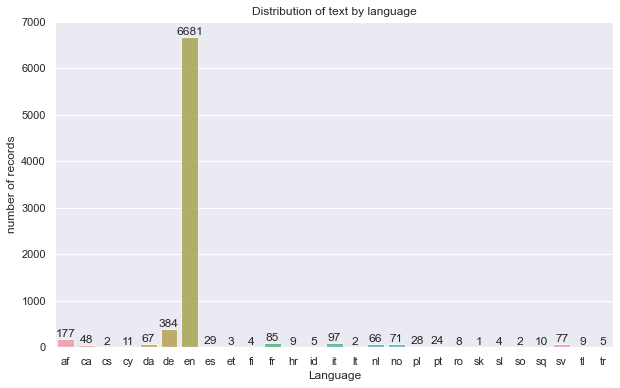

In [546]:
x = df_incidents["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

It can be observed that a majority of descriptions are in English language, however there is a small proportion with other languages as well (~5%). Initially tried to convert other languages to English before pre-processing

In [547]:
import googletrans
from googletrans import Translator

In [548]:
# Function to translate the text to english.
def fn_translate(df,lang):
    try:
        if lang == 'en':
            return df
        else:
            return translator.translate(df).text
    except:
        return df
    
    
df_incidents['English_Description'] = df_incidents.apply(lambda x: fn_translate(x['New_Description'], x['language']), axis=1)

In [549]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description,language,English_Description
0,login issue,-verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,GRP_0,login issue -verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,en,login issue -verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.
1,outlook,"_x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",GRP_0,"outlook _x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",en,"outlook _x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind"
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,en,cant log in to vpn _x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access hr_tool page,en,unable to access hr_tool page unable to access hr_tool page
4,skype error,skype error,GRP_0,skype error skype error,no,skype error skype error


In [550]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description,language,English_Description
0,login issue,-verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,GRP_0,login issue -verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,en,login issue -verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.
1,outlook,"_x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",GRP_0,"outlook _x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",en,"outlook _x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind"
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,en,cant log in to vpn _x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access hr_tool page,en,unable to access hr_tool page unable to access hr_tool page
4,skype error,skype error,GRP_0,skype error skype error,no,skype error skype error


### Text Cleaning and Pre-Processing 

Before we start with any NLP project we need to pre-process the data to get it all in a consistent format.We need to clean, tokenize and convert our data into a matrix.

In [551]:
import string
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords

In [552]:
### Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace('_x000D_','')    
    text=text.replace('?','')
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    text=text.replace('regards', '')

    text = re.sub(r'[a-zA-Z0-9]+@[a-zA-Z0-9]+\.[^ ]+', '', text)
    text = re.sub(r'[^ ]+\..*\.[^ ]+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    custom_punctuation='!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\r\n', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\S+@\S+', '', text)

    text = text.lower()
    return text

In [553]:
df_incidents['Cleaned_Text'] = df_incidents['New_Description'].apply(lambda x: clean_text(x))

In [554]:
df_incidents['Cleaned_Text'] = df_incidents['Cleaned_Text'].apply(lambda s: " ".join(s.split()))

In [555]:
df_incidents.drop(df_incidents[df_incidents['Cleaned_Text'].apply(lambda x: len(x) < 2)].index, inplace = True)

In [556]:
from langdetect import detect
df_incidents.drop(df_incidents[df_incidents['Cleaned_Text'].apply(lambda x: detect(x) != 'en')].index, inplace = True)

In [557]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description,language,English_Description,Cleaned_Text
0,login issue,-verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,GRP_0,login issue -verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,en,login issue -verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,login issue verified user detailsemployee manager namechecked the user name in ad and reset the passwordadvised the user to login and checkcaller confirmed that he was able to loginissue resolved
1,outlook,"_x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",GRP_0,"outlook _x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",en,"outlook _x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",outlook hmjdrvpb teammy meetingsskype meetings etc are not appearing in my outlook calendar can somebody advise how to correct ts
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,en,cant log in to vpn _x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,cant log in to vpn eylqgodm cannot log on to vpn
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,unable to log in to engineering tool and skype unable to log in to engineering tool and skype,en,unable to log in to engineering tool and skype unable to log in to engineering tool and skype,unable to log in to engineering tool and skype unable to log in to engineering tool and skype
7,ticket_no1550391- employment status - new non-employee [enter user's name],ticket_no1550391- employment status - new non-employee [enter user's name],GRP_0,ticket_no1550391- employment status - new non-employee [enter user's name] ticket_no1550391- employment status - new non-employee [enter user's name],en,ticket_no1550391- employment status - new non-employee [enter user's name] ticket_no1550391- employment status - new non-employee [enter user's name],employment status new nonemployee employment status new nonemployee


In [558]:
!pip install nltk --quiet

In [559]:
!python -m nltk.downloader stopwords

C:\ProgramData\Anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [560]:
df_incidents.shape

(6421, 7)

#### Stopwords removal

Now, let's get rid of the stopwords i.e words which occur very frequently but have no possible value like a, an, the, are etc.

In [561]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
df_incidents['Cleaned_Text'] = df_incidents['Cleaned_Text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df_incidents['Cleaned_Text'].head()

0    login issue verified user detailsemployee manager namechecked user name ad reset passwordadvised user login checkcaller confirmed able loginissue resolved
1                                                      outlook hmjdrvpb teammy meetingsskype meetings etc appearing outlook calendar somebody advise correct ts
2                                                                                                                          cant log vpn eylqgodm cannot log vpn
5                                                                                           unable log engineering tool skype unable log engineering tool skype
7                                                                                           employment status new nonemployee employment status new nonemployee
Name: Cleaned_Text, dtype: object

In [562]:
!pip install textblob --quiet

In [563]:
!python -m nltk.downloader wordnet

C:\ProgramData\Anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\venky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [564]:
!python -m nltk.downloader omw-1.4

C:\ProgramData\Anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\venky\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### Lemmatization

Refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. 

In [565]:
## Lemmatization
from textblob import Word
import nltk
df_incidents['Cleaned_Text']= df_incidents['Cleaned_Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
df_incidents['Cleaned_Text'].head()

0    login issue verified user detailsemployee manager namechecked user name ad reset passwordadvised user login checkcaller confirmed able loginissue resolved
1                                                        outlook hmjdrvpb teammy meetingsskype meeting etc appearing outlook calendar somebody advise correct t
2                                                                                                                          cant log vpn eylqgodm cannot log vpn
5                                                                                           unable log engineering tool skype unable log engineering tool skype
7                                                                                           employment status new nonemployee employment status new nonemployee
Name: Cleaned_Text, dtype: object

In [566]:
# Defining WorkCloud function
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

In [567]:
from wordcloud import WordCloud, STOPWORDS 

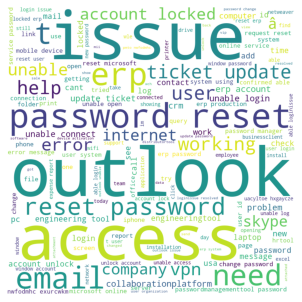

In [568]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_0'].Cleaned_Text)
# plot the WordCloud image                        
plt.figure(figsize = (4, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Inferences
- It can be observed that L1/L2 incidents (Group 0) are related to common incidents such as 
* Password reset
* Access related related issues
* Outlook issues etc

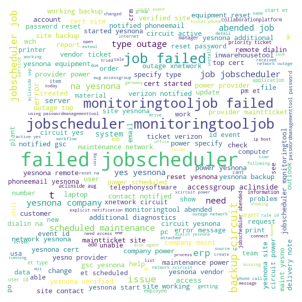

In [569]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']!='GRP_0'].Cleaned_Text)
# plot the WordCloud image                        
plt.figure(figsize = (4, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Inferences
- It can be observed that L3/Functional incidents (other than Group 0) are related to un-common incidents such as 
* Outages
* Job failures
* Monitoring Tool Notifications etc

In [570]:
!pip install Counter --quiet

#### Reviewing most common words in corpus

In [571]:
import string
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords

In [572]:
wd_counts = Counter()
for i, row in df_incidents.iterrows():
    wd_counts.update(row['Cleaned_Text'].split())
    
wd_counts.most_common(20)

[('jobscheduler', 1881),
 ('failed', 1668),
 ('yesnona', 1568),
 ('password', 1419),
 ('erp', 1277),
 ('user', 1250),
 ('job', 1174),
 ('t', 1099),
 ('issue', 982),
 ('reset', 969),
 ('unable', 925),
 ('access', 924),
 ('account', 773),
 ('monitoringtooljob', 765),
 ('site', 759),
 ('company', 757),
 ('need', 730),
 ('error', 694),
 ('ticket', 683),
 ('power', 668)]

In [573]:
!pip install sklearn --quiet

#### Transforming Tokens into Vecor using tf-idf

In [574]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdIdfVec = TfidfVectorizer(min_df=5, use_idf=True, stop_words=None,lowercase=False)

In [575]:
text = tdIdfVec.fit_transform(df_incidents.Cleaned_Text)

In [576]:
tf_matrix = text.toarray()

In [577]:
vocab = tdIdfVec.get_feature_names()

In [578]:
tf_df = pd.DataFrame(np.round(tf_matrix, 2), columns=vocab)

In [579]:
tf_df.head()

abap  abended  ability  able  aborted  absolutely  accept  accepting  \
0   0.0      0.0      0.0  0.17      0.0         0.0     0.0        0.0   
1   0.0      0.0      0.0  0.00      0.0         0.0     0.0        0.0   
2   0.0      0.0      0.0  0.00      0.0         0.0     0.0        0.0   
3   0.0      0.0      0.0  0.00      0.0         0.0     0.0        0.0   
4   0.0      0.0      0.0  0.00      0.0         0.0     0.0        0.0   

   acces  access  accessgroup  accessing  account  accountadvised  accounting  \
0    0.0     0.0          0.0        0.0      0.0             0.0         0.0   
1    0.0     0.0          0.0        0.0      0.0             0.0         0.0   
2    0.0     0.0          0.0        0.0      0.0             0.0         0.0   
3    0.0     0.0          0.0        0.0      0.0             0.0         0.0   
4    0.0     0.0          0.0        0.0      0.0             0.0         0.0   

   acct  ack  aclinside  across  action  activate  activated  activation  \
0   0.0  0.0        0.0     0.0     0.0       0.0        0.0         0.0   
1   0.0  0.0        0.0     0.0     0.0       0.0        0.0         0.0   
2   0.0  0.0        0.0     0.0     0.0       0.0        0.0         0.0   
3   0.0  0.0        0.0     0.0     0.0       0.0        0.0         0.0   
4   0.0  0.0        0.0     0.0     0.0       0.0        0.0         0.0   

   active  activesync  activity  actual    ad  adapter  add  added  addin  \
0     0.0         0.0       0.0     0.0  0.23      0.0  0.0    0.0    0.0   
1     0.0         0.0       0.0     0.0  0.00      0.0  0.0    0.0    0.0   
2     0.0         0.0       0.0     0.0  0.00      0.0  0.0    0.0    0.0   
3     0.0         0.0       0.0     0.0  0.00      0.0  0.0    0.0    0.0   
4     0.0         0.0       0.0     0.0  0.00      0.0  0.0    0.0    0.0   

   adding  addition  additional  address  addressed  admin  administration  \
0     0.0       0.0         0.0      0.0        0.0    0.0             0.0   
1     0.0       0.0         0.0      0.0        0.0    0.0             0.0   
2     0.0       0.0         0.0      0.0        0.0    0.0             0.0   
3     0.0       0.0         0.0      0.0        0.0    0.0             0.0   
4     0.0       0.0         0.0      0.0        0.0    0.0             0.0   

   administrator  adobe  advance  advice  advise  advised   ae  aerp  \
0            0.0    0.0      0.0     0.0     0.0      0.0  0.0   0.0   
1            0.0    0.0      0.0     0.0     0.3      0.0  0.0   0.0   
2            0.0    0.0      0.0     0.0     0.0      0.0  0.0   0.0   
3            0.0    0.0      0.0     0.0     0.0      0.0  0.0   0.0   
4            0.0    0.0      0.0     0.0     0.0      0.0  0.0   0.0   

   affected  africa  afternoon  afternooni  agent  agentid  ago  agreement  \
0       0.0     0.0        0.0         0.0    0.0      0.0  0.0        0.0   
1       0.0     0.0        0.0         0.0    0.0      0.0  0.0        0.0   
2       0.0     0.0        0.0         0.0    0.0      0.0  0.0        0.0   
3       0.0     0.0        0.0         0.0    0.0      0.0  0.0        0.0   
4       0.0     0.0        0.0         0.0    0.0      0.0  0.0        0.0   

   alert  alerting  allcan  alli  allow  allowed  allowing  allows  along  \
0    0.0       0.0     0.0   0.0    0.0      0.0       0.0     0.0    0.0   
1    0.0       0.0     0.0   0.0    0.0      0.0       0.0     0.0    0.0   
2    0.0       0.0     0.0   0.0    0.0      0.0       0.0     0.0    0.0   
3    0.0       0.0     0.0   0.0    0.0      0.0       0.0     0.0    0.0   
4    0.0       0.0     0.0   0.0    0.0      0.0       0.0     0.0    0.0   

   already  also  although  always  amar  amerirtca  amerirtcas  amount  amto  \
0      0.0   0.0       0.0     0.0   0.0        0.0         0.0     0.0   0.0   
1      0.0   0.0       0.0     0.0   0.0        0.0         0.0     0.0   0.0   
2      0.0   0.0       0.0     0.0   0.0        0.0         0.0     

In [580]:
tf_df.columns

Index(['abap', 'abended', 'ability', 'able', 'aborted', 'absolutely', 'accept',
       'accepting', 'acces', 'access',
       ...
       'zebra', 'zero', 'zkwfqagb', 'zu', 'zugriff', 'zuxcfonv', 'zywoxerf',
       'zzmails', 'è½', 'ðµð½ð'],
      dtype='object', length=1893)

In [581]:
print(tf_df.shape)

(6421, 1893)


In [582]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df_incidents['token_desc'] = df_incidents['Cleaned_Text'].apply(lambda x: tokenizer.tokenize(x))

In [583]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description,language,English_Description,Cleaned_Text,token_desc
0,login issue,-verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,GRP_0,login issue -verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,en,login issue -verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,login issue verified user detailsemployee manager namechecked user name ad reset passwordadvised user login checkcaller confirmed able loginissue resolved,"[login, issue, verified, user, detailsemployee, manager, namechecked, user, name, ad, reset, passwordadvised, user, login, checkcaller, confirmed, able, loginissue, resolved]"
1,outlook,"_x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",GRP_0,"outlook _x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",en,"outlook _x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",outlook hmjdrvpb teammy meetingsskype meeting etc appearing outlook calendar somebody advise correct t,"[outlook, hmjdrvpb, teammy, meetingsskype, meeting, etc, appearing, outlook, calendar, somebody, advise, correct, t]"
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,en,cant log in to vpn _x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,cant log vpn eylqgodm cannot log vpn,"[cant, log, vpn, eylqgodm, cannot, log, vpn]"
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,unable to log in to engineering tool and skype unable to log in to engineering tool and skype,en,unable to log in to engineering tool and skype unable to log in to engineering tool and skype,unable log engineering tool skype unable log engineering tool skype,"[unable, log, engineering, tool, skype, unable, log, engineering, tool, skype]"
7,ticket_no1550391- employment status - new non-employee [enter user's name],ticket_no1550391- employment status - new non-employee [enter user's name],GRP_0,ticket_no1550391- employment status - new non-employee [enter user's name] ticket_no1550391- employment status - new non-employee [enter user's name],en,ticket_no1550391- employment status - new non-employee [enter user's name] ticket_no1550391- employment status - new non-employee [enter user's name],employment status new nonemployee employment status new nonemployee,"[employment, status, new, nonemployee, employment, status, new, nonemployee]"


In [584]:
from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf for ticket
tfidf = TfidfVectorizer(max_features=250, analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
inc_tfidf = tfidf.fit_transform(df_incidents['Cleaned_Text'])

In [585]:
len(inc_tfidf.todense())

6421

In [586]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [587]:
# Top Words with least TF-IDF Score - lower score means more frequently used in corpus
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
job,2.872815
jobscheduler,2.915242
failed,3.029332
failed jobscheduler,3.096719
monitoringtooljob,3.126303
jobscheduler monitoringtooljob,3.131538
job failed,3.179935
monitoringtooljob failed,3.200812
erp,3.223573
issue,3.223573


In [588]:
# Top tokens with highest TF-IDF Score - higher score means less frequently used in corpus
tfidf.sort_values(by=['tfidf'], ascending=False).head(20)

,tfidf
accessgroup,7.282578
accessgroup aclinside,7.282578
aclinside,7.282578
id event,6.053913
host,5.760152
disk,5.707042
slow,5.593098
priority,5.562792
erp account,5.547977
incident,5.533378


In [589]:
#tf-idf array into pandas dataframe
#collect the tfid matrix in numpy array
array = inc_tfidf.todense()

# store the tf-idf array into pandas dataframe
df_inc = pd.DataFrame(array)
df_inc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,0.0,0.0,0.246777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.196717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.500952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.280877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276504,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.604103,0.0,0.0,0.0,0.0,0.292353,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2916,0.338805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.628314,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,

In [590]:
df_inc['Assignment_Group'] = df_incidents['Assignment group']

## Model Building

In [591]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve,confusion_matrix, f1_score

### Function to build pipeline for Modle Building and Evaluation

In [592]:
from time import time
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return  (time()-self.start_ts)
    
timer = Timer()

# A method to train and test the model
def run_classification(modelType, estimator, X_train, X_test, y_train, y_test, ngram=1, arch_name=None, pipelineRequired=True,isDeepModel=False):
    timer.start()
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, ngram))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])

    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1,callbacks=call_backs(arch_name))
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :      
        clf.fit(X_train, y_train)
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('accuracy %s' % accuracy_score(y_pred, y_test)) 
    print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    #print(timer.stop(), 'to run the model')
    
    dict_results = {"Algorithm": modelType,
                         "Train Accuracy Score": round(metrics.accuracy_score(y_train, y_train_pred.round()) * 100,2),
                         "Test Accuracy Score": round(metrics.accuracy_score(y_test, y_pred.round()) * 100,2),
                         "Train Recall Score":round((metrics.recall_score(y_train, y_train_pred.round(),average='weighted')) * 100,2),
                         "Test Recall Score":round((metrics.recall_score(y_test, y_pred.round(),average='weighted')) * 100,2),
                         "Train Precision":round((metrics.precision_score(y_train, y_train_pred.round(),average='weighted')) * 100,2),
                         "Test Precision":round((metrics.precision_score(y_test, y_pred.round(),average='weighted')) * 100,2),    
                         "Time Taken in seconds": timer.stop()
                       }
    return pd.Series(dict_results).to_frame().T

In [593]:
# Filtering classes having less than 100 tickets to create an effective model
df_incidents_filtered = df_incidents[df_incidents['Assignment group'].map(df_incidents['Assignment group'].value_counts()) > 100]
x = df_incidents_filtered['Cleaned_Text']
y = df_incidents_filtered['Assignment group']

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)


log_cols=["Classifier", "accuracy","f1_score"]
log = pd.DataFrame(columns=log_cols)
df_score = pd.DataFrame(columns= ['Algorithm', "Train Accuracy Score", "Test Accuracy Score", "Train Recall Score", "Test Recall Score", "Train Precision", "Test Precision","Time Taken in seconds"])

## Building Baseline Models using Traditional ML alogrithms

### Naive Bayes

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable.

Advantages: It works very well with text data Easy to implement Fast in comparing to other algorithms

Disadvantages: A strong assumption about the shape of the data distribution Limited by data scarcity for which any possible value in feature space, a likelihood value must be estimated by a frequentist

In [594]:
df_score = pd.concat([df_score,run_classification('Naive_Bayes',MultinomialNB(), X_train, X_test, y_train, y_test)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])
Training accuracy: 66.43%
Testing accuracy: 66.14%
accuracy 0.6613861386138614
f1 score 0.7779514572883143
Confusion matrix:
 [[530   0   0   0   0   0   0   0   0   0   0   0]
 [ 16   0   0   0   0   0   0   0   0   0  11   0]
 [ 29   0  10   0   0   0   0   0   0   0   4   0]
 [ 27   0   0   0   0   0   0   0   0   0   1   0]
 [ 20   0   0   0   0   0   0   0   0   0   2   0]
 [ 39   0   0   0   0   0   0   0   0   0   0   0]
 [ 40   0   0   0   0   0   6   0   0   0   0   0]
 [ 38   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [ 10   0   0   0   0   0   0   0   0   1  25   0]
 [  6   0   1   0   0   0   0   0   0   0 120   0]
 [ 12   0   0   0   0   0   0   0   0   0  36   1]]
Classification report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82       53

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618


### KNN Classifier

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors. k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification.

Both for classification and regression, a useful technique can be to assign weights to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. For example, a common weighting scheme consists in giving each neighbor a weight of 1/d, where d is the distance to the neighbor.

The neighbors are taken from a set of objects for which the class (for k-NN classification) or the object property value (for k-NN regression) is known. This can be thought of as the training set for the algorithm, though no explicit training step is required.

A peculiarity of the k-NN algorithm is that it is sensitive to the local structure of the data.

In [595]:
df_score = pd.concat([df_score,run_classification('KNN',KNeighborsClassifier(), X_train, X_test, y_train, y_test)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])
Training accuracy: 74.45%
Testing accuracy: 70.30%
accuracy 0.7029702970297029
f1 score 0.7624463359114925
Confusion matrix:
 [[523   0   1   0   0   2   1   1   0   0   0   2]
 [ 10   5   0   2   0   0   0   0   0   0  10   0]
 [ 20   0  18   0   2   0   0   1   0   0   2   0]
 [ 18   0   0   8   0   0   0   0   0   1   1   0]
 [ 13   0   1   0   5   0   0   0   1   0   2   0]
 [ 33   0   0   0   0   4   0   2   0   0   0   0]
 [ 28   0   1   0   0   0  14   3   0   0   0   0]
 [ 31   0   0   0   0   0   1   6   0   0   0   0]
 [  2   0   0   0   0   0   0   0   4   0  19   0]
 [  4   0   0   1   0   0   0   0   5   7  19   0]
 [  5   0   3   0   1   0   0   0   6   0 112   0]
 [ 10   0   0   0   0   0   0   0   4   0  31   4]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85  

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431


### Support Vector Machine Classifier

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

When data are unlabelled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. The support-vector clustering algorithm, created by Hava Siegelmann and Vladimir Vapnik, applies the statistics of support vectors, developed in the support vector machines algorithm, to categorize unlabeled data, and is one of the most widely used clustering algorithms in industrial applications.

The advantages of support vector machines are based on scikit-learn page:

Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient. Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels. The disadvantages of support vector machines include:

If the number of features is much greater than the number of samples, avoiding over-fitting via choosing kernel functions and regularization term is crucial. SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

In [596]:
df_score = pd.concat([df_score,run_classification('SVC',LinearSVC(), X_train, X_test, y_train, y_test)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])
Training accuracy: 89.53%
Testing accuracy: 72.97%
accuracy 0.7297029702970297
f1 score 0.7686209036009309
Confusion matrix:
 [[503   1   3   2   2   5   8   3   0   1   0   2]
 [  4   9   0   2   0   0   2   0   0   0  10   0]
 [ 12   0  26   0   1   0   0   0   0   0   3   1]
 [ 12   0   0  14   0   0   0   0   0   1   1   0]
 [  7   0   1   0  10   1   0   0   0   0   2   1]
 [ 28   0   0   1   0   7   0   3   0   0   0   0]
 [ 22   1   1   0   0   0  18   3   0   0   0   1]
 [ 19   0   0   0   0   3   2  13   0   0   1   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  1   2   0   2   0   0   0   0   0   7  24   0]
 [  3   0   3   0   1   0   0   0   0   0 119   1]
 [  5   0   0   0   0   0   0   0   0   0  33  11]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88       530
  

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625


### Decision Tree

Decision tree classifiers are utilized as a well known classification technique in different pattern recognition issues, for example, image classification and character recognition (Safavian & Landgrebe, 1991). Decision tree classifiers perform more successfully, specifically for complex classification problems, due to their high adaptability and computationally effective features. Besides, decision tree classifiers exceed expectations over numerous typical supervised classification methods (Friedl & Brodley, 1997).

In particular, no distribution assumption is needed by decision tree classifiers regarding the input data. This particular feature gives to the Decision Tree Classifiers a higher adaptability to deal with different datasets, whether numeric or categorical, even with missing data. Also, decision tree classifiers are basically nonparametric. Also, decision trees are ideal for dealing with nonlinear relations among features and classes. At long last, the classification procedure through a tree-like structure is constantly natural and interpretable.

In [597]:
df_score = pd.concat([df_score,run_classification('Decision Tree',DecisionTreeClassifier(), X_train, X_test, y_train, y_test)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])
Training accuracy: 91.01%
Testing accuracy: 67.33%
accuracy 0.6732673267326733
f1 score 0.7044575451425044
Confusion matrix:
 [[459   2   8   4   4  21  13  14   0   2   1   2]
 [  5   9   0   2   0   0   1   0   0   0  10   0]
 [ 10   0  24   0   1   1   0   0   0   0   6   1]
 [ 10   1   0  14   0   0   0   0   0   1   1   1]
 [ 11   0   1   2   3   1   0   1   0   0   3   0]
 [ 19   0   0   1   1  12   0   6   0   0   0   0]
 [ 23   0   1   1   0   2  18   1   0   0   0   0]
 [ 17   1   0   1   1   5   0  13   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0  24   0]
 [  0   1   0   7   0   0   0   0   0   3  25   0]
 [  3   1   4   0   2   0   0   0   0   0 117   0]
 [  6   0   0   1   0   0   0   1   0   0  33   8]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592


### Random Forest

Random forests or random decision forests technique is an ensemble learning method for text classification. This method was introduced by T. Kam Ho in 1995 for first time which used t trees in parallel. This technique was later developed by L. Breiman in 1999 that they found converged for RF as a margin measure

In [598]:
df_score = pd.concat([df_score,run_classification('Random Forest',RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Training accuracy: 91.01%
Testing accuracy: 70.30%
accuracy 0.7029702970297029
f1 score 0.7753971299156833
Confusion matrix:
 [[524   0   1   1   1   1   2   0   0   0   0   0]
 [ 14   1   0   2   0   0   0   0   0   0  10   0]
 [ 18   0  19   0   2   0   0   0   0   0   4   0]
 [ 15   0   0  11   0   0   0   0   0   1   1   0]
 [ 15   0   1   0   4   0   0   0   0   0   2   0]
 [ 37   0   0   0   0   2   0   0   0   0   0   0]
 [ 30   0   1   0   0   0  13   2   0   0   0   0]
 [ 31   0   0   0   0   1   0   6   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  4   0   0   1   0   0   0   0   0   7  24   0]
 [  5   0   3   0   1   0   0   0   0   0 118   0]
 [ 11   0   0   0   0   0   0   0   0   0  33   5]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827


In [599]:
def run_classification_bi(modelType, estimator, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=True):
    timer.start()
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
        clf.fit(X_train, y_train)
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('accuracy %s' % accuracy_score(y_pred, y_test)) 
    print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    #print(timer.stop(), 'to run the model')
    
    dict_results = {"Algorithm": modelType,
                         "Train Accuracy Score": round(metrics.accuracy_score(y_train, y_train_pred.round()) * 100,2),
                         "Test Accuracy Score": round(metrics.accuracy_score(y_test, y_pred.round()) * 100,2),
                         "Train Recall Score":round((metrics.recall_score(y_train, y_train_pred.round(),average='weighted')) * 100,2),
                         "Test Recall Score":round((metrics.recall_score(y_test, y_pred.round(),average='weighted')) * 100,2),
                         "Train Precision":round((metrics.precision_score(y_train, y_train_pred.round(),average='weighted')) * 100,2),
                         "Test Precision":round((metrics.precision_score(y_test, y_pred.round(),average='weighted')) * 100,2),    
                         "Time Taken in seconds": timer.stop()
                       }
    return pd.Series(dict_results).to_frame().T

### SVC Bi-Gram Classifier

In [600]:
df_score = pd.concat([df_score,run_classification('SVC_bi',LinearSVC(), X_train, X_test, y_train, y_test, ngram=2)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()), ('clf', LinearSVC())])
Training accuracy: 90.79%
Testing accuracy: 74.26%
accuracy 0.7425742574257426
f1 score 0.7824492183232699
Confusion matrix:
 [[512   0   3   2   1   2   5   2   0   1   0   2]
 [  5   9   0   2   0   0   1   0   0   0  10   0]
 [ 13   0  25   0   1   0   0   0   0   0   4   0]
 [  9   0   0  16   0   0   0   0   0   2   1   0]
 [ 10   0   1   0   9   0   0   0   0   0   2   0]
 [ 27   0   0   0   0  11   1   0   0   0   0   0]
 [ 24   1   1   0   0   0  18   2   0   0   0   0]
 [ 20   0   1   0   0   2   2  12   0   0   1   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  2   1   0   1   0   0   0   0   0   8  24   0]
 [  3   0   2   0   1   0   0   0   0   0 120   1]
 [  4   1   0   0   0   1   0   0   0   0  33  10]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.97     

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921


### SVC Trigram Classifier

In [601]:
df_score = pd.concat([df_score,run_classification('SVC_tri',LinearSVC(), X_train, X_test, y_train, y_test, ngram=3)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()), ('clf', LinearSVC())])
Training accuracy: 90.89%
Testing accuracy: 73.86%
accuracy 0.7386138613861386
f1 score 0.782558155578193
Confusion matrix:
 [[516   0   2   1   1   1   4   2   0   1   0   2]
 [  7   7   0   2   0   0   1   0   0   0  10   0]
 [ 15   0  23   0   1   0   0   0   0   0   4   0]
 [ 10   0   0  15   0   0   0   0   0   2   1   0]
 [ 10   0   1   0   9   0   0   0   0   0   2   0]
 [ 28   0   0   0   0  11   0   0   0   0   0   0]
 [ 24   1   1   0   0   0  18   2   0   0   0   0]
 [ 22   0   1   0   0   2   2  10   0   0   1   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  2   1   0   1   0   0   0   0   0   8  24   0]
 [  3   0   2   0   1   0   0   0   0   0 120   1]
 [  5   1   0   0   0   1   0   0   0   0  33   9]]
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.97      

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921
0,SVC_tri,90.89,73.86,90.89,73.86,94.25,72.95,0.614383


### Random Forest Trigram Classifier

In [602]:
df_score = pd.concat([df_score,run_classification('Random Forest_tri',RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test, ngram=3)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Training accuracy: 91.04%
Testing accuracy: 69.60%
accuracy 0.696039603960396
f1 score 0.7776093661629213
Confusion matrix:
 [[528   0   0   0   0   1   1   0   0   0   0   0]
 [ 15   2   0   0   0   0   0   0   0   0  10   0]
 [ 18   0  20   0   1   0   0   0   0   0   4   0]
 [ 19   0   0   6   0   0   0   0   0   2   1   0]
 [ 16   0   1   0   2   0   0   0   0   0   3   0]
 [ 38   0   0   0   0   1   0   0   0   0   0   0]
 [ 31   0   1   0   0   0  12   2   0   0   0   0]
 [ 34   0   0   0   0   0   1   3   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  4   0   0   1   0   0   0   0   0   7  24   0]
 [  5   0   3   0   1   0   0   0   0   0 118   0]
 [ 12   0   0   0   0   0   0   0   0   0  33   4]]
Classification report:
               precision    recall  f1-score   support

          

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921
0,SVC_tri,90.89,73.86,90.89,73.86,94.25,72.95,0.614383
0,Random Forest_tri,91.04,69.6,91.04,69.6,94.59,70.5,6.827186


### Random Forest Bigram Classifier

In [603]:
df_score = pd.concat([df_score,run_classification('Random Forest_bi',RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test, ngram=2)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Training accuracy: 91.04%
Testing accuracy: 70.10%
accuracy 0.700990099009901
f1 score 0.7801436838786722
Confusion matrix:
 [[528   0   0   0   1   0   1   0   0   0   0   0]
 [ 14   2   0   1   0   0   0   0   0   0  10   0]
 [ 18   0  20   0   1   0   0   0   0   0   4   0]
 [ 16   0   0   9   0   0   0   0   0   2   1   0]
 [ 16   0   1   0   2   0   0   0   0   0   3   0]
 [ 37   0   0   1   0   1   0   0   0   0   0   0]
 [ 30   0   1   0   0   0  13   2   0   0   0   0]
 [ 33   0   0   0   0   1   1   3   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  4   0   0   1   0   0   0   0   0   7  24   0]
 [  4   0   3   0   1   0   0   0   0   0 119   0]
 [ 12   0   0   0   0   0   0   0   0   0  33   4]]
Classification report:
               precision    recall  f1-score   support

          

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921
0,SVC_tri,90.89,73.86,90.89,73.86,94.25,72.95,0.614383
0,Random Forest_tri,91.04,69.6,91.04,69.6,94.59,70.5,6.827186
0,Random Forest_bi,91.04,70.1,91.04,70.1,94.4,70.49,4.724622


### Decision Tree Bigram Classifier

In [604]:
df_score = pd.concat([df_score,run_classification('Decision Tree_bi',DecisionTreeClassifier(), X_train, X_test, y_train, y_test, ngram=2)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])
Training accuracy: 91.04%
Testing accuracy: 65.84%
accuracy 0.6584158415841584
f1 score 0.6888432262927884
Confusion matrix:
 [[449   5  15   4   4  15  13  13   2   2   3   5]
 [  6   7   0   3   0   1   0   0   0   0  10   0]
 [  7   1  27   0   2   0   2   0   0   0   4   0]
 [  9   1   0  14   0   0   0   0   0   2   2   0]
 [ 12   0   1   1   3   1   0   0   1   0   3   0]
 [ 24   1   1   1   0   9   0   3   0   0   0   0]
 [ 20   0   2   2   0   1  19   2   0   0   0   0]
 [ 24   0   1   0   2   4   1   6   0   0   0   0]
 [  0   0   0   1   0   0   0   0   1   0  23   0]
 [  0   1   0   4   0   0   0   0   0   6  25   0]
 [  3   1   5   0   1   0   0   0   1   0 116   0]
 [  7   0   0   1   0   0   0   0   0   0  33   8]]
Classification report:
               precision    recall  f1-score   support

         

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921
0,SVC_tri,90.89,73.86,90.89,73.86,94.25,72.95,0.614383
0,Random Forest_tri,91.04,69.6,91.04,69.6,94.59,70.5,6.827186
0,Random Forest_bi,91.04,70.1,91.04,70.1,94.4,70.49,4.724622
0,Decision Tree_bi,91.04,65.84,91.04,65.84,94.38,63.92,1.441523


### Decision Tree Trigram Classifier

In [605]:
df_score = pd.concat([df_score,run_classification('Decision Tree_tri',DecisionTreeClassifier(), X_train, X_test, y_train, y_test, ngram=3)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])
Training accuracy: 91.04%
Testing accuracy: 65.94%
accuracy 0.6594059405940594
f1 score 0.6843151826658074
Confusion matrix:
 [[439   2   7   5  14  17  14  18   3   4   4   3]
 [  6   6   0   3   0   1   1   0   0   0  10   0]
 [  7   0  28   1   2   0   1   0   0   0   4   0]
 [  8   0   0  13   1   0   0   1   1   2   1   1]
 [ 10   0   1   1   6   0   0   1   1   0   2   0]
 [ 26   0   1   1   0   6   0   5   0   0   0   0]
 [ 19   0   3   2   0   1  19   1   0   1   0   0]
 [ 20   0   0   1   0   3   0  13   0   0   1   0]
 [  0   0   0   1   0   0   0   0   1   0  23   0]
 [  1   1   0   2   0   0   0   0   0   6  26   0]
 [  3   0   3   0   1   0   0   0   0   0 120   0]
 [  6   0   0   1   0   0   0   0   0   0  33   9]]
Classification report:
               precision    recall  f1-score   support

         

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921
0,SVC_tri,90.89,73.86,90.89,73.86,94.25,72.95,0.614383
0,Random Forest_tri,91.04,69.6,91.04,69.6,94.59,70.5,6.827186
0,Random Forest_bi,91.04,70.1,91.04,70.1,94.4,70.49,4.724622
0,Decision Tree_bi,91.04,65.84,91.04,65.84,94.38,63.92,1.441523


### XG Boost

In [606]:
!pip install xgboost --quiet

In [607]:
import xgboost as xgb
df_score = pd.concat([df_score,run_classification('XG-Boost',xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8,subsample=0.8, nthread=10, learning_rate=0.1),X_train, X_test, y_train, y_test)])
df_score

[11:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
         

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921
0,SVC_tri,90.89,73.86,90.89,73.86,94.25,72.95,0.614383
0,Random Forest_tri,91.04,69.6,91.04,69.6,94.59,70.5,6.827186
0,Random Forest_bi,91.04,70.1,91.04,70.1,94.4,70.49,4.724622
0,Decision Tree_bi,91.04,65.84,91.04,65.84,94.38,63.92,1.441523


#### Inferences

Among all Traditional ML models we tried, below are the observations:

* All models are over-fitting (Accuracy, Recall and Precision scores in Training is much higher compared to Testing)
* Hyper parameter tuning is needed to build generic models and avoid over fitting.
* Among the baseline models built -  SVC Model (Trigram) has best scores in Testing compared to other models.
* Among Tree Based models - XG Boost has best test scores in Testing but is highly overfit


## Building ANN Models

Artificial Neural Network, unlike statistical ML algorithms, is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria.

In [608]:
# Sequential Modeling
import keras.backend as K
from keras.datasets import imdb
from tensorflow.keras.models import Model, Sequential
from keras.layers.merge import Concatenate
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, TimeDistributed, Reshape,Dot
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D
from keras.constraints import max_norm, unit_norm
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import *
from keras.initializers import Constant
from tensorflow.keras.utils import to_categorical

In [609]:
#Path where you want to save the weights, model and checkpoints
model_path = "Weights/"
%mkdir Weights

# Define model callbacks
def call_backs(name):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=100)
    model_checkpoint =  ModelCheckpoint(model_path + name + '_epoch{epoch:02d}_loss{val_loss:.4f}.h5',
                                                               monitor='val_loss',
                                                               verbose=1,
                                                               save_best_only=True,
                                                               save_weights_only=False,
                                                               mode='min',
                                                               period=1)
    return [model_checkpoint, early_stopping]

A subdirectory or file Weights already exists.


In [610]:
from sklearn.model_selection import train_test_split
x = df_incidents_filtered['Cleaned_Text']
y = df_incidents_filtered['Assignment group']
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)

## CNN Model (Using Glove)

Another deep learning architecture that is employed for hierarchical document classification is Convolutional Neural Networks (CNN) . Although originally built for image processing with architecture similar to the visual cortex, CNNs have also been effectively used for text classification. In a basic CNN for image processing, an image tensor is convolved with a set of kernels of size d by d. These convolution layers are called feature maps and can be stacked to provide multiple filters on the input. To reduce the computational complexity, CNNs use pooling which reduces the size of the output from one layer to the next in the network. Different pooling techniques are used to reduce outputs while preserving important features.

The most common pooling method is max pooling where the maximum element is selected from the pooling window. In order to feed the pooled output from stacked featured maps to the next layer, the maps are flattened into one column. The final layers in a CNN are typically fully connected dense layers. In general, during the back-propagation step of a convolutional neural network not only the weights are adjusted but also the feature detector filters. A potential problem of CNN used for text is the number of ‘channels’, Sigma (size of the feature space). This might be very large (e.g. 50K), for text but for images this is less of a problem (e.g. only 3 channels of RGB). This means the dimensionality of the CNN for text is very high.

In [611]:
gloveFileName = 'glove.6B.200d.txt'
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM=200
MAX_NB_WORDS=75000

# Function to generate Embedding
def loadData_Tokenizer(X_train, X_test,filename):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open(filename, encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)


embedding_matrix = []

def buildEmbed_matrices(word_index,embedding_dim):
    embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])), "into shape",str(len(embedding_vector)),
                      " Please make sure your"" EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [612]:
# Generate Glove embedded datasets
X_train_Glove, X_test_Glove, word_index, embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

Found 9829 unique tokens.
(5049, 500)
Total 400000 word vectors.


In [613]:
def Build_Model_CNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
        def buildModel_CNN(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5):
        word_index in word index ,
        embeddings_index is embeddings index, look at data_helper.py
        nClasses is number of classes,
        MAX_SEQUENCE_LENGTH is maximum lenght of text sequences,
        EMBEDDING_DIM is an int value for dimention of word embedding look at data_helper.py
    """
    model = Sequential()
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)
    # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    print("Filter  ",layer)
    for fl in range(0,layer):
        filter_sizes.append((fl+2))
    node = 128
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        #l_pool = Dropout(0.25)(l_pool)
        convs.append(l_pool)
    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_batch1 = BatchNormalization()(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_batch1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_batch2 = BatchNormalization()(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_batch2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='softmax')(l_dense)
    model = Model(sequence_input, preds)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [614]:
# Train the network and run classification
model_CNN = Build_Model_CNN_Text(word_index,embedding_matrix, 12)

Filter   5
Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_30 (Embedding)        (None, 500, 200)     1966000     input_13[0][0]                   
__________________________________________________________________________________________________
conv1d_91 (Conv1D)              (None, 499, 128)     51328       embedding_30[0][0]               
__________________________________________________________________________________________________
conv1d_92 (Conv1D)              (None, 498, 128)     76928       embedding_30[0][0]               
________________________________________________________________________________

In [615]:
df_score = pd.concat([df_score,run_classification('Model_CNN',model_CNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='CNN')])
df_score

Epoch 1/10
32/32 [==============================] - 5s 135ms/step - loss: 2.5722 - accuracy: 0.4501 - val_loss: 2.0087 - val_accuracy: 0.5248

Epoch 00001: val_loss improved from inf to 2.00868, saving model to Weights\CNN_epoch01_loss2.0087.h5
Epoch 2/10
32/32 [==============================] - 3s 95ms/step - loss: 1.8608 - accuracy: 0.5222 - val_loss: 2.1294 - val_accuracy: 0.5248

Epoch 00002: val_loss did not improve from 2.00868
Epoch 3/10
32/32 [==============================] - 3s 95ms/step - loss: 1.8366 - accuracy: 0.5236 - val_loss: 2.1973 - val_accuracy: 0.5248

Epoch 00003: val_loss did not improve from 2.00868
Epoch 4/10
32/32 [==============================] - 3s 95ms/step - loss: 1.7713 - accuracy: 0.5241 - val_loss: 2.2598 - val_accuracy: 0.5248

Epoch 00004: val_loss did not improve from 2.00868
Epoch 5/10
32/32 [==============================] - 3s 95ms/step - loss: 1.7229 - accuracy: 0.5234 - val_loss: 2.2707 - val_accuracy: 0.5248

Epoch 00005: val_loss did not impr

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921
0,SVC_tri,90.89,73.86,90.89,73.86,94.25,72.95,0.614383
0,Random Forest_tri,91.04,69.6,91.04,69.6,94.59,70.5,6.827186
0,Random Forest_bi,91.04,70.1,91.04,70.1,94.4,70.49,4.724622
0,Decision Tree_bi,91.04,65.84,91.04,65.84,94.38,63.92,1.441523


## Recurrent Neural Network

RNN assigns more weights to the previous data points of sequence. Therefore, this technique is a powerful method for text, string and sequential data classification. Moreover, this technique could be used for image classification as we did in this work. In RNN, the neural net considers the information of previous nodes in a very sophisticated method which allows for better semantic analysis of the structures in the dataset.

Gated Recurrent Unit (GRU)

Gated Recurrent Unit (GRU) is a gating mechanism for RNN which was introduced by J. Chung et al. and K.Cho et al.. GRU is a simplified variant of the LSTM architecture, but there are differences as follows: GRU contains two gates and does not possess any internal memory and finally, a second non-linearity is not applied.

In [616]:
def Build_Model_RNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
    def buildModel_RNN(word_index, embeddings_matrix, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5):
    word_index in word index ,
    embeddings_matrix is embeddings_matrix, look at data_helper.py
    nClasses is number of classes,
    MAX_SEQUENCE_LENGTH is maximum lenght of text sequences
    """
    model = Sequential()
    hidden_layer = 3
    gru_node = 32
    
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    print(gru_node)
    for i in range(0,hidden_layer):
        model.add(GRU(gru_node,return_sequences=True, recurrent_dropout=0.2))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(GRU(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(nclasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='sgd',
                      metrics=['accuracy'])
    
    print(model.summary())
    return model

In [617]:
# Train the network and run classification
model_RNN = Build_Model_RNN_Text(word_index,embedding_matrix, 12)

32
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 500, 200)          1966000   
_________________________________________________________________
gru_12 (GRU)                 (None, 500, 32)           22464     
_________________________________________________________________
dropout_81 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
batch_normalization_50 (Batc (None, 500, 32)           128       
_________________________________________________________________
gru_13 (GRU)                 (None, 500, 32)           6336      
_________________________________________________________________
dropout_82 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
batch_normalization_51 (Batc (None, 500, 32)      

In [618]:
df_score = pd.concat([df_score,run_classification('Model_RNN',model_RNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='RNN')])
df_score

Epoch 1/10
32/32 [==============================] - 317s 10s/step - loss: 2.9522 - accuracy: 0.1468 - val_loss: 2.2838 - val_accuracy: 0.5267

Epoch 00001: val_loss improved from inf to 2.28379, saving model to Weights\RNN_epoch01_loss2.2838.h5
Epoch 2/10
32/32 [==============================] - 315s 10s/step - loss: 2.3979 - accuracy: 0.2736 - val_loss: 2.0429 - val_accuracy: 0.5960

Epoch 00002: val_loss improved from 2.28379 to 2.04294, saving model to Weights\RNN_epoch02_loss2.0429.h5
Epoch 3/10
32/32 [==============================] - 313s 10s/step - loss: 2.0942 - accuracy: 0.3890 - val_loss: 1.8314 - val_accuracy: 0.6000

Epoch 00003: val_loss improved from 2.04294 to 1.83138, saving model to Weights\RNN_epoch03_loss1.8314.h5
Epoch 4/10
32/32 [==============================] - 316s 10s/step - loss: 1.8607 - accuracy: 0.4934 - val_loss: 1.6584 - val_accuracy: 0.6010

Epoch 00004: val_loss improved from 1.83138 to 1.65836, saving model to Weights\RNN_epoch04_loss1.6584.h5
Epoch 5/

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921
0,SVC_tri,90.89,73.86,90.89,73.86,94.25,72.95,0.614383
0,Random Forest_tri,91.04,69.6,91.04,69.6,94.59,70.5,6.827186
0,Random Forest_bi,91.04,70.1,91.04,70.1,94.4,70.49,4.724622
0,Decision Tree_bi,91.04,65.84,91.04,65.84,94.38,63.92,1.441523


## Recurrent Convolutional Neural Networks (RCNN)

It is also used for text classification. The main idea of this technique is capturing contextual information with the recurrent structure and constructing the representation of text using a convolutional neural network. This architecture is a combination of RNN and CNN to use advantages of both technique in a model.

In [619]:
def Build_Model_RCNN_Text(word_index, embeddings_matrix, nclasses):
    kernel_size = 2
    filters = 256
    pool_size = 2
    gru_node = 256
    
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(LSTM(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(nclasses))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [620]:
# Train the network and run classification
model_RCNN = Build_Model_RCNN_Text(word_index,embedding_matrix, 12)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 500, 200)          1966000   
_________________________________________________________________
dropout_85 (Dropout)         (None, 500, 200)          0         
_________________________________________________________________
batch_normalization_55 (Batc (None, 500, 200)          800       
_________________________________________________________________
conv1d_98 (Conv1D)           (None, 499, 256)          102656    
_________________________________________________________________
max_pooling1d_98 (MaxPooling (None, 249, 256)          0         
_________________________________________________________________
conv1d_99 (Conv1D)           (None, 248, 256)          131328    
_________________________________________________________________
max_pooling1d_99 (MaxPooling (None, 124, 256)        

In [621]:
df_score = pd.concat([df_score,run_classification('Model_RCNN',model_RCNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='RCNN')])
df_score

Epoch 1/10
32/32 [==============================] - 30s 773ms/step - loss: 1.9911 - accuracy: 0.4593 - val_loss: 2.4083 - val_accuracy: 0.5248

Epoch 00001: val_loss improved from inf to 2.40834, saving model to Weights\RCNN_epoch01_loss2.4083.h5
Epoch 2/10
32/32 [==============================] - 24s 753ms/step - loss: 1.8370 - accuracy: 0.5256 - val_loss: 2.3400 - val_accuracy: 0.5248

Epoch 00002: val_loss improved from 2.40834 to 2.34005, saving model to Weights\RCNN_epoch02_loss2.3400.h5
Epoch 3/10
32/32 [==============================] - 24s 767ms/step - loss: 1.8162 - accuracy: 0.5276 - val_loss: 2.2598 - val_accuracy: 0.5248

Epoch 00003: val_loss improved from 2.34005 to 2.25980, saving model to Weights\RCNN_epoch03_loss2.2598.h5
Epoch 4/10
32/32 [==============================] - 23s 734ms/step - loss: 1.8110 - accuracy: 0.5293 - val_loss: 2.1263 - val_accuracy: 0.5248

Epoch 00004: val_loss improved from 2.25980 to 2.12629, saving model to Weights\RCNN_epoch04_loss2.1263.h5


,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921
0,SVC_tri,90.89,73.86,90.89,73.86,94.25,72.95,0.614383
0,Random Forest_tri,91.04,69.6,91.04,69.6,94.59,70.5,6.827186
0,Random Forest_bi,91.04,70.1,91.04,70.1,94.4,70.49,4.724622
0,Decision Tree_bi,91.04,65.84,91.04,65.84,94.38,63.92,1.441523


## LSTM (using Glove)

It was introduced by S. Hochreiter and J. Schmidhuber and developed by many research scientists.

To deal with these problems Long Short-Term Memory (LSTM) is a special type of RNN that preserves long term dependency in a more effective way compared to the basic RNNs. This is particularly useful to overcome vanishing gradient problem as LSTM uses multiple gates to carefully regulate the amount of information that will be allowed into each node state.

In [622]:
EMBEDDING_DIM = 100
gloveFileName100 = 'glove.6B.100d.txt'

from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed, Activation
from keras.layers import Flatten, Permute, merge, Input
from keras.layers import Embedding
from keras.models import Model
from keras.layers import Input, Dense, multiply, concatenate, Dropout
from keras.layers import GRU, Bidirectional


def Build_Model_LTSM_Text(word_index, embeddings_matrix, nclasses):
    kernel_size = 2
    filters = 256
    pool_size = 2
    gru_node = 256
    
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, recurrent_dropout=0.2)))
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(nclasses))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [623]:
X_train_Glove,X_test_Glove, word_index,embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName100)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

model_LTSM = Build_Model_LTSM_Text(word_index,embedding_matrix, 12)

Found 9829 unique tokens.
(5049, 500)
Total 400000 word vectors.
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 500, 100)          983000    
_________________________________________________________________
dropout_90 (Dropout)         (None, 500, 100)          0         
_________________________________________________________________
conv1d_102 (Conv1D)          (None, 499, 256)          51456     
_________________________________________________________________
max_pooling1d_102 (MaxPoolin (None, 249, 256)          0         
_________________________________________________________________
conv1d_103 (Conv1D)          (None, 248, 256)          131328    
_________________________________________________________________
max_pooling1d_103 (MaxPoolin (None, 124, 256)          0         
______________________________________________________

In [624]:
df_score = pd.concat([df_score,run_classification('Model_LSTM',model_LTSM, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='LSTM')])
df_score

Epoch 1/10
32/32 [==============================] - 56s 1s/step - loss: 1.8454 - accuracy: 0.5093 - val_loss: 1.7981 - val_accuracy: 0.5248

Epoch 00001: val_loss improved from inf to 1.79809, saving model to Weights\LSTM_epoch01_loss1.7981.h5
Epoch 2/10
32/32 [==============================] - 45s 1s/step - loss: 1.7809 - accuracy: 0.5241 - val_loss: 1.7757 - val_accuracy: 0.5248

Epoch 00002: val_loss improved from 1.79809 to 1.77566, saving model to Weights\LSTM_epoch02_loss1.7757.h5
Epoch 3/10
32/32 [==============================] - 47s 1s/step - loss: 1.7715 - accuracy: 0.5241 - val_loss: 1.7701 - val_accuracy: 0.5248

Epoch 00003: val_loss improved from 1.77566 to 1.77012, saving model to Weights\LSTM_epoch03_loss1.7701.h5
Epoch 4/10
32/32 [==============================] - 44s 1s/step - loss: 1.7698 - accuracy: 0.5241 - val_loss: 1.7675 - val_accuracy: 0.5248

Epoch 00004: val_loss improved from 1.77012 to 1.76753, saving model to Weights\LSTM_epoch04_loss1.7675.h5
Epoch 5/10
3

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921
0,SVC_tri,90.89,73.86,90.89,73.86,94.25,72.95,0.614383
0,Random Forest_tri,91.04,69.6,91.04,69.6,94.59,70.5,6.827186
0,Random Forest_bi,91.04,70.1,91.04,70.1,94.4,70.49,4.724622
0,Decision Tree_bi,91.04,65.84,91.04,65.84,94.38,63.92,1.441523


## Bidirectional LSTM

In [625]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb # Loading Data
from tensorflow.keras.preprocessing.sequence import pad_sequences # Preprocessing

# Importing the libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Conv1D,Input, Bidirectional, LSTM, Dense, SpatialDropout1D, Input, Dropout,Embedding,Concatenate, TimeDistributed 

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each issue statement
MAX_SEQUENCE_LENGTH = 250
# Fixed attribute
EMBEDDING_DIM = 100

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each issue statement
MAX_SEQUENCE_LENGTH = 250
# Fixed attribute
EMBEDDING_DIM = 100

# Tokenize the issues by coverting each one to sequence of integers or into a vector
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_incidents_filtered['Cleaned_Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Truncate & pad the input sequences so that an uniform length is maintained for modelling
X = tokenizer.texts_to_sequences(df_incidents_filtered['Cleaned_Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

# Convert the labels that are categorical into numbers
Y = pd.get_dummies(df_incidents_filtered['Assignment group']).values
print('Shape of label tensor:', Y.shape)

# Splint the data into train & test with 90% and 10% hierarchy
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

timer = Timer()
timer.start()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
BiLSTM_MultiClsModel = Sequential()
BiLSTM_MultiClsModel.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
BiLSTM_MultiClsModel.add(SpatialDropout1D(0.2))
BiLSTM_MultiClsModel.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
BiLSTM_MultiClsModel.add(Dense(12, activation='softmax'))
BiLSTM_MultiClsModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

epochs = 10
batch_size = 64

history = BiLSTM_MultiClsModel.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[callback])
timer.stop()

# Print the accuracies for the test set
accuracy_factor = BiLSTM_MultiClsModel.evaluate(X_test, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}\n  Precision: {:0.3f}\n  Recall: {:0.3f}'.format(accuracy_factor[0], accuracy_factor[1], accuracy_factor[2], accuracy_factor[3]))

Found 9829 unique tokens.
Shape of data tensor: (5049, 250)
Shape of label tensor: (5049, 12)
(4039, 250) (4039, 12)
(1010, 250) (1010, 12)
Epoch 1/10
57/57 [==============================] - 91s 2s/step - loss: 1.7789 - accuracy: 0.5373 - precision_5: 0.6913 - recall_5: 0.3524 - val_loss: 1.3868 - val_accuracy: 0.6485 - val_precision_5: 0.7444 - val_recall_5: 0.4975
Epoch 2/10
57/57 [==============================] - 90s 2s/step - loss: 1.1953 - accuracy: 0.6492 - precision_5: 0.8054 - recall_5: 0.5612 - val_loss: 1.1768 - val_accuracy: 0.6584 - val_precision_5: 0.8148 - val_recall_5: 0.4901
Epoch 3/10
57/57 [==============================] - 87s 2s/step - loss: 0.9990 - accuracy: 0.6891 - precision_5: 0.8776 - recall_5: 0.5662 - val_loss: 1.1781 - val_accuracy: 0.6287 - val_precision_5: 0.8850 - val_recall_5: 0.4381
Epoch 4/10
57/57 [==============================] - 88s 2s/step - loss: 0.8828 - accuracy: 0.7183 - precision_5: 0.9089 - recall_5: 0.5708 - val_loss: 1.1556 - val_accura

In [626]:
dict_results = {"Algorithm": 'Bidirectional LSTM',
                         "Train Accuracy Score": 84.7,
                         "Test Accuracy Score": 65.10,
                         "Train Recall Score":75.46,
                         "Test Recall Score":52.50,
                         "Train Precision":94.26,
                         "Test Precision":73.94,    
                         "Time Taken in seconds": 898.73
                       }
lstm_results = pd.Series(dict_results).to_frame().T

In [627]:
df_score = pd.concat([df_score,lstm_results])
df_score

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921
0,SVC_tri,90.89,73.86,90.89,73.86,94.25,72.95,0.614383
0,Random Forest_tri,91.04,69.6,91.04,69.6,94.59,70.5,6.827186
0,Random Forest_bi,91.04,70.1,91.04,70.1,94.4,70.49,4.724622
0,Decision Tree_bi,91.04,65.84,91.04,65.84,94.38,63.92,1.441523


#### Inferences

Among all ANN ML models we tried, below are the observations:

* ANN models has lesser performance compared to Traditional ML Models
* Among ANN Models - Bidirectional LSTM has best performance metrics among others


* Now we know that Traiditional ML models are best predictors for this dataset, lets try to do optimise initial Baseline models using hyper parameter tuning (as Baseline models are overfit)

* We will consider only Top Traiditonal ML Models (SVC and Random Forest for Hyper Parameter Tuning)


## Hyper Parameter Tuning

* Through Grid Search , best hyper parameters were arrived for SVC and Random Forest


* Best Parameters for SVC Model are : (C=2.5, gamma=0.1, kernel='rbf')
* Best Parameters for Random Forest Model are : (n_estimators=100, max_features='sqrt',max_depth=40,min_samples_split=2)

* Lets build Optimised models using these parameters




## SVC Optimised Model (After Hyper Parameter Tuning)

In [628]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)
df_score = pd.concat([df_score,run_classification('SVC_optimised',SVC(C=2.5, gamma=0.1, kernel='rbf'), X_train, X_test, y_train, y_test, ngram=1)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(C=2.5, gamma=0.1))])
Training accuracy: 72.52%
Testing accuracy: 69.21%
accuracy 0.692079207920792
f1 score 0.7775631610005348
Confusion matrix:
 [[529   0   0   0   0   0   1   0   0   0   0   0]
 [ 16   1   0   0   0   0   0   0   0   0  10   0]
 [ 21   0  16   0   1   0   1   0   0   0   4   0]
 [ 17   0   0   9   0   0   0   0   0   1   1   0]
 [ 16   0   1   0   3   0   0   0   0   0   2   0]
 [ 39   0   0   0   0   0   0   0   0   0   0   0]
 [ 32   0   0   0   0   0  14   0   0   0   0   0]
 [ 35   0   0   0   0   0   1   2   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  3   0   0   2   0   0   0   0   0   7  24   0]
 [  7   0   3   0   1   0   0   0   0   0 116   0]
 [ 12   0   0   0   0   0   0   0   0   0  35   2]]
Classification report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84    

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921
0,SVC_tri,90.89,73.86,90.89,73.86,94.25,72.95,0.614383
0,Random Forest_tri,91.04,69.6,91.04,69.6,94.59,70.5,6.827186
0,Random Forest_bi,91.04,70.1,91.04,70.1,94.4,70.49,4.724622
0,Decision Tree_bi,91.04,65.84,91.04,65.84,94.38,63.92,1.441523


## SVC Bi-Gram Optimised Model (After Hyper Parameter Tuning)

In [629]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)
df_score = pd.concat([df_score,run_classification('SVC_optimised_bi',SVC(C=2.5, gamma=0.1, kernel='rbf'), X_train, X_test, y_train, y_test, ngram=2)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()), ('clf', SVC(C=2.5, gamma=0.1))])
Training accuracy: 71.21%
Testing accuracy: 68.61%
accuracy 0.6861386138613862
f1 score 0.7775907082642995
Confusion matrix:
 [[529   0   0   0   0   0   1   0   0   0   0   0]
 [ 16   1   0   0   0   0   0   0   0   0  10   0]
 [ 22   0  17   0   0   0   0   0   0   0   4   0]
 [ 23   0   0   3   0   0   0   0   0   1   1   0]
 [ 18   0   1   0   1   0   0   0   0   0   2   0]
 [ 39   0   0   0   0   0   0   0   0   0   0   0]
 [ 32   0   0   0   0   0  14   0   0   0   0   0]
 [ 35   0   0   0   0   0   1   2   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  4   0   0   1   0   0   0   0   0   7  24   0]
 [  8   0   1   0   1   0   0   0   0   0 117   0]
 [ 12   0   0   0   0   0   0   0   0   0  35   2]]
Classification report:
               precision    recall  f1-score   support

           0       0.71     

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921
0,SVC_tri,90.89,73.86,90.89,73.86,94.25,72.95,0.614383
0,Random Forest_tri,91.04,69.6,91.04,69.6,94.59,70.5,6.827186
0,Random Forest_bi,91.04,70.1,91.04,70.1,94.4,70.49,4.724622
0,Decision Tree_bi,91.04,65.84,91.04,65.84,94.38,63.92,1.441523


## Optimised Random Forest Model (After Hyper Parameter Tuning)

In [630]:
df_score = pd.concat([df_score,run_classification('Random Forest_optimised',RandomForestClassifier(n_estimators=100, max_features='sqrt',max_depth=40,min_samples_split=2), X_train, X_test, y_train, y_test, ngram=1)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 RandomForestClassifier(max_depth=40, max_features='sqrt'))])
Training accuracy: 73.41%
Testing accuracy: 68.02%
accuracy 0.6801980198019802
f1 score 0.7730833021798201
Confusion matrix:
 [[529   0   0   0   0   0   1   0   0   0   0   0]
 [ 16   1   0   0   0   0   0   0   0   0  10   0]
 [ 27   0  12   0   1   0   0   0   0   0   3   0]
 [ 21   0   0   5   0   0   0   0   0   1   1   0]
 [ 18   0   0   0   2   0   0   0   0   0   2   0]
 [ 39   0   0   0   0   0   0   0   0   0   0   0]
 [ 32   0   1   0   0   0  12   1   0   0   0   0]
 [ 38   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  6   0   0   0   0   0   0   0   0   6  24   0]
 [ 10   0   1   0   0   0   0   0   0   0 116   0]
 [ 12   0   0   0   0   0   0   0   0   0  33   4]]
Classification report:
               precision    recall  f1-score   su

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921
0,SVC_tri,90.89,73.86,90.89,73.86,94.25,72.95,0.614383
0,Random Forest_tri,91.04,69.6,91.04,69.6,94.59,70.5,6.827186
0,Random Forest_bi,91.04,70.1,91.04,70.1,94.4,70.49,4.724622
0,Decision Tree_bi,91.04,65.84,91.04,65.84,94.38,63.92,1.441523


## Random Forest Bi Gram Optimised Model (after Hyper Parameter Tuning)

In [631]:
df_score = pd.concat([df_score,run_classification('Random Forest_optimised_bi',RandomForestClassifier(n_estimators=100, max_features='sqrt',max_depth=40,min_samples_split=2), X_train, X_test, y_train, y_test, ngram=2)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 RandomForestClassifier(max_depth=40, max_features='sqrt'))])
Training accuracy: 69.40%
Testing accuracy: 67.13%
accuracy 0.6712871287128713
f1 score 0.7717628658875128
Confusion matrix:
 [[529   0   0   0   0   0   1   0   0   0   0   0]
 [ 16   1   0   0   0   0   0   0   0   0  10   0]
 [ 29   0  10   0   0   0   0   0   0   0   4   0]
 [ 27   0   0   0   0   0   0   0   0   0   1   0]
 [ 20   0   0   0   0   0   0   0   0   0   2   0]
 [ 39   0   0   0   0   0   0   0   0   0   0   0]
 [ 32   0   0   0   0   1  12   1   0   0   0   0]
 [ 37   0   0   0   0   0   1   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  23   0]
 [  5   0   0   0   0   0   0   0   0   7  24   0]
 [ 12   0   0   0   0   0   0   0   0   0 115   0]
 [ 12   0   0   0   0   0   0   0   0   0  33   4]]
Classification report:
               

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,66.43,66.14,66.43,66.14,61.85,59.8,0.142618
0,KNN,74.45,70.3,74.45,70.3,77.39,70.95,0.586431
0,SVC,89.53,72.97,89.53,72.97,93.16,70.71,0.208625
0,Decision Tree,91.01,67.33,91.01,67.33,94.35,65.49,0.569592
0,Random Forest,91.01,70.3,91.01,70.3,94.58,71.55,2.111827
0,SVC_bi,90.79,74.26,90.79,74.26,94.14,73.31,0.412921
0,SVC_tri,90.89,73.86,90.89,73.86,94.25,72.95,0.614383
0,Random Forest_tri,91.04,69.6,91.04,69.6,94.59,70.5,6.827186
0,Random Forest_bi,91.04,70.1,91.04,70.1,94.4,70.49,4.724622
0,Decision Tree_bi,91.04,65.84,91.04,65.84,94.38,63.92,1.441523


## Conclusion & Summary

In this project, an automatic ticket assignment using multi-class classification has been carried out in which various machine learning and deep neural networks have been trained and tested to identify the best text classification algorithm.

Both Traditional ML and ANN Models were considered for Model Building. It has been observed that Traditional ML Models have slighter edge compared to ANN Models for this probem statement

There were overfitting issues with Initial BaseLine models which was addressed after Hyper Paramater Tuning. 

Final model to be deployed is Optimised SVC Model or Optimised Random Forest Model

Considering model was built only on 8500 records, it is important to monitor Recall and FPR closely after Production deployment and do a retraining once additional information is collected. 